<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Prediction_Using_Gradient_Boosting_and_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title:

Lead Conversion Prediction Using Gradient Boosting and Bagging

Problem Statement:

Many businesses collect leads through various channels (website forms, campaigns, etc.), but not all leads convert into paying customers. Predicting which leads are most likely to convert helps businesses prioritize efforts, optimize marketing, and increase revenue.

This project aims to build a machine learning pipeline that predicts lead conversion (Converted = 1) based on lead attributes, engagement metrics, and demographic data using Gradient Boosting and Bagging classifiers.

Objectives:

Data Exploration & Understanding

Inspect dataset columns, types, and missing values

Identify numeric and categorical features

Data Preprocessing

Handle missing values (numeric & categorical)

Encode categorical variables using One-Hot Encoding

Feature & Target Separation

Define target variable (Converted)

Separate features into numeric and categorical

Train/Test Split

Split the dataset into training (80%) and testing (20%) sets

Maintain class distribution for balanced evaluation

Model Building

Train Gradient Boosting Classifier as a powerful ensemble model

Train Bagging Classifier as a variance-reducing ensemble for comparison

Model Evaluation

Measure performance using accuracy, classification report, and confusion matrix

Compare Gradient Boosting vs Bagging

Feature Importance & Interpretation

Identify top features contributing to lead conversion

Visualize numeric and one-hot encoded categorical feature importances

Hyperparameter Tuning

Optimize Gradient Boosting parameters using GridSearchCV

Evaluate the tuned model on the test set

Portfolio Readiness

Present a reproducible end-to-end ML pipeline

Include plots, performance metrics, and model interpretation

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving archive (21).zip to archive (21).zip


{'archive (21).zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xea\x1eTO\x8b\xb8\xce\xec\xff\xff\xff\xff\xff\xff\xff\xff\x1a\x00\x14\x00Leads Data Dictionary.xlsx\x01\x00\x10\x00\x86.\x00\x00\x00\x00\x00\x00\x16$\x00\x00\x00\x00\x00\x00\xedZeT\\k\xb2m\x1c\x82\xbb\x07www\x08\xee\xee\xee\xee\xee\x1e\xdc\xdd\x82\xbb\xbbK\x82\x05w\x08\x10\xdc\xdd\xfdq\xef\xbcY\xf7N&\xb3\xd6\xfb\xfffw\xaf\xd3_\xf7\xe9\xaa\xd5\xe7tU\xed\xfa\xaaJN\x12\x04\x14\x05\x00\x0e\x80\x04\x00\x00\x04\x00\x01\xb6\x80\t\x1b \x00\x00\x14\x0c\x00@\x06@\x02k\n\xd9\xda8\x19\xdb8\xe9*\xb9\xdb\x19;j\xd3\xbaY[\xe1\x7f\x01\x05&\xcf\x05\x00\x03\xfe\x8b\xff\xd7\xa8P\x1a\xb6\xe9\xa3G\xe8T=\xe4\x13\xeeR\t\xcf\x0b-+\x83\xc4i\xc3\xd1$\xde\x87Hu\x8bW#n\xda\xc1$\x7f\xf6&3\x91W\xae\x85\xec%\x91\xb7\x9a\xd0$\xbd\xe2\xc6\xa8\\&U\x17\xe4\xdf\xb2\xa2}T\x97%\xd6\x83.\x8e\xaat\xb8\xe0y\x11\xcb\x11\t(\xa8P\x89\xaa\x8f\x8d`\xc9\xc5\x80=;\x03\x9fi\x84\x90jY6\xa0\xb5 |#$Aci\xf8\xc0\xb4\xd7{)s X\x1e\xc6\'D\xd2I\xb9[\x06\xfc\xb0x\xc43\xdc\xa7\x0e,I\xe1\x8ca

In [3]:
# 0) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [83]:
import zipfile

In [87]:
# Extract ZIP file
with zipfile.ZipFile('/content/archive (21).zip', 'r') as z:
    z.extractall('/content/')

# Loading the CSV inside the ZIP
df = pd.read_csv('/content/Leads.csv')

In [88]:
# Shape of the dataset
print("Dataset Shape (rows, columns):", df.shape, "\n")

Dataset Shape (rows, columns): (9240, 37) 



In [89]:
# Displaying the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [90]:
# Column list
print("\nColumn Names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:03d}. {col}")


Column Names:
001. Prospect ID
002. Lead Number
003. Lead Origin
004. Lead Source
005. Do Not Email
006. Do Not Call
007. Converted
008. TotalVisits
009. Total Time Spent on Website
010. Page Views Per Visit
011. Last Activity
012. Country
013. Specialization
014. How did you hear about X Education
015. What is your current occupation
016. What matters most to you in choosing a course
017. Search
018. Magazine
019. Newspaper Article
020. X Education Forums
021. Newspaper
022. Digital Advertisement
023. Through Recommendations
024. Receive More Updates About Our Courses
025. Tags
026. Lead Quality
027. Update me on Supply Chain Content
028. Get updates on DM Content
029. Lead Profile
030. City
031. Asymmetrique Activity Index
032. Asymmetrique Profile Index
033. Asymmetrique Activity Score
034. Asymmetrique Profile Score
035. I agree to pay the amount through cheque
036. A free copy of Mastering The Interview
037. Last Notable Activity


In [91]:
# Data types and missing values
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                 

In [92]:
#  Quick summary statistics
print("\nSummary statistics for numeric columns:")
display(df.describe(include=[np.number]).T)

print("\nSummary statistics for categorical columns:")
display(df.describe(include=['object']).T)


Summary statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0



Summary statistics for categorical columns:


,count,unique,top,freq
Prospect ID,9240,9240,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,1
Lead Origin,9240,5,Landing Page Submission,4886
Lead Source,9204,21,Google,2868
Do Not Email,9240,2,No,8506
Do Not Call,9240,2,No,9238
Last Activity,9137,17,Email Opened,3437
Country,6779,38,India,6492
Specialization,7802,19,Select,1942
How did you hear about X Education,7033,10,Select,5043
What is your current occupation,6550,6,Unemployed,5600


In [93]:
# Missing value analysis
print("\nMissing Values (sorted descending):")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0] if not missing.empty else "No missing values detected.")


Missing Values (sorted descending):
Lead Quality                                     4767
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
dtype: int64


In [94]:
# Target column check
target_col = 'Converted'  # default target for this dataset
if target_col in df.columns:
    print(f"\nTarget column '{target_col}' exists.")
    print("Class distribution:")
    print(df[target_col].value_counts())
else:
    print(f"\nTarget column '{target_col}' not found. Please identify the correct target column.")


Target column 'Converted' exists.
Class distribution:
Converted
0    5679
1    3561
Name: count, dtype: int64


✅ Step 3 — Prepare Features and Target

In [95]:
# Define target column
target_col = 'Converted'  # The column we want to predict
y = df[target_col]

#  Define features (drop target from dataset)
X = df.drop(columns=[target_col])

In [96]:
# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [97]:
# Quick overview
print("Number of features:", X.shape[1])
print("Number of numeric features:", len(numeric_features))
print("Number of categorical features:", len(categorical_features))
print("\nNumeric features:", numeric_features)
print("\nCategorical features:", categorical_features)

Number of features: 36
Number of numeric features: 6
Number of categorical features: 30

Numeric features: ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Categorical features: ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [98]:
#  Check for missing values in features
print("\nMissing values per feature (if any):")
missing_features = X.isnull().sum()
print(missing_features[missing_features > 0] if not missing_features.empty else "No missing values in features.")


Missing values per feature (if any):
Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64


✅ Step 4 — Preprocessing (Missing Values + Encoding)

In [99]:
# ------------------------------------------------------------
# Handle Missing Values & Encode Categorical Features
# ------------------------------------------------------------
# Purpose:
# - Impute missing values in numeric and categorical columns
# - Encode categorical variables using One-Hot Encoding
# - Prepare data for ML models
# ------------------------------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
# 1) Numeric preprocessing: fill missing values with median
numeric_transformer = SimpleImputer(strategy='median')

# 2) Categorical preprocessing: fill missing with mode, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [100]:
# Combine numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [101]:
# Fit and transform the features (X)
X_processed = preprocessor.fit_transform(X)

In [27]:
X_processed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 326069 stored elements and shape (9240, 9454)>

In [28]:
# Check the shape of the transformed feature set
print("Original feature shape:", X.shape)
print("Processed feature shape (after encoding):", X_processed.shape)

Original feature shape: (9240, 36)
Processed feature shape (after encoding): (9240, 9454)


In [102]:
# Summary
print("\nStep 4 completed: Missing values handled, categorical features encoded.")


Step 4 completed: Missing values handled, categorical features encoded.


Step 5 — Split Data into Training and Test Sets

In [30]:
from sklearn.model_selection import train_test_split

In [103]:
# Split the processed features and target
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,    # processed features
    y,              # target variable
    test_size=0.2,  # 20% test data
    random_state=42, # reproducibility
    stratify=y       # maintain class distribution in target
)

In [104]:
#  Print shapes to confirm
print("Training set shape (X_train):", X_train.shape)
print("Training target shape (y_train):", y_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Test target shape (y_test):", y_test.shape)

Training set shape (X_train): (7392, 9454)
Training target shape (y_train): (7392,)
Test set shape (X_test): (1848, 9454)
Test target shape (y_test): (1848,)


Step 6 — Train Gradient Boosting Classifier (First ML Model)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=200,   # number of trees
    learning_rate=0.1,  # shrinkage
    max_depth=3,        # depth of each tree
    random_state=42
)

In [106]:
# Train the model
print("Training Gradient Boosting Classifier...")
gb_model.fit(X_train, y_train)

Training Gradient Boosting Classifier...


GradientBoostingClassifier(n_estimators=200, random_state=42)

In [107]:
# Predict on test set
y_pred = gb_model.predict(X_test)

In [108]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\nGradient Boosting Classifier Performance:")
print("Accuracy on test set: {:.2%}".format(accuracy))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier Performance:
Accuracy on test set: 92.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1136
           1       0.90      0.91      0.91       712

    accuracy                           0.93      1848
   macro avg       0.92      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848



In [109]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1066   70]
 [  64  648]]


In [111]:
# Step summary
print("\nStep completed: Gradient Boosting model trained and evaluated.")


Step completed: Gradient Boosting model trained and evaluated.


Step 7 — Feature Importance (Gradient Boosting)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Extract feature importances from trained model
importances = gb_model.feature_importances_

In [114]:
# 1) Extract feature importances from trained Gradient Boosting model
importances = gb_model.feature_importances_

# 2) Numeric feature names
numeric_names = numeric_features

# 3) Categorical feature names after one-hot encoding
cat_ohe = preprocessor.named_transformers_['cat']['onehot']
cat_names = cat_ohe.get_feature_names_out(categorical_features)

# 4) Combine numeric and categorical feature names
all_feature_names = np.concatenate([numeric_names, cat_names])

# 5) Confirm lengths match (important!)
assert len(all_feature_names) == len(importances), "Feature names and importances must have same length!"

# 6) Create DataFrame for easy sorting and plotting
feat_imp_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

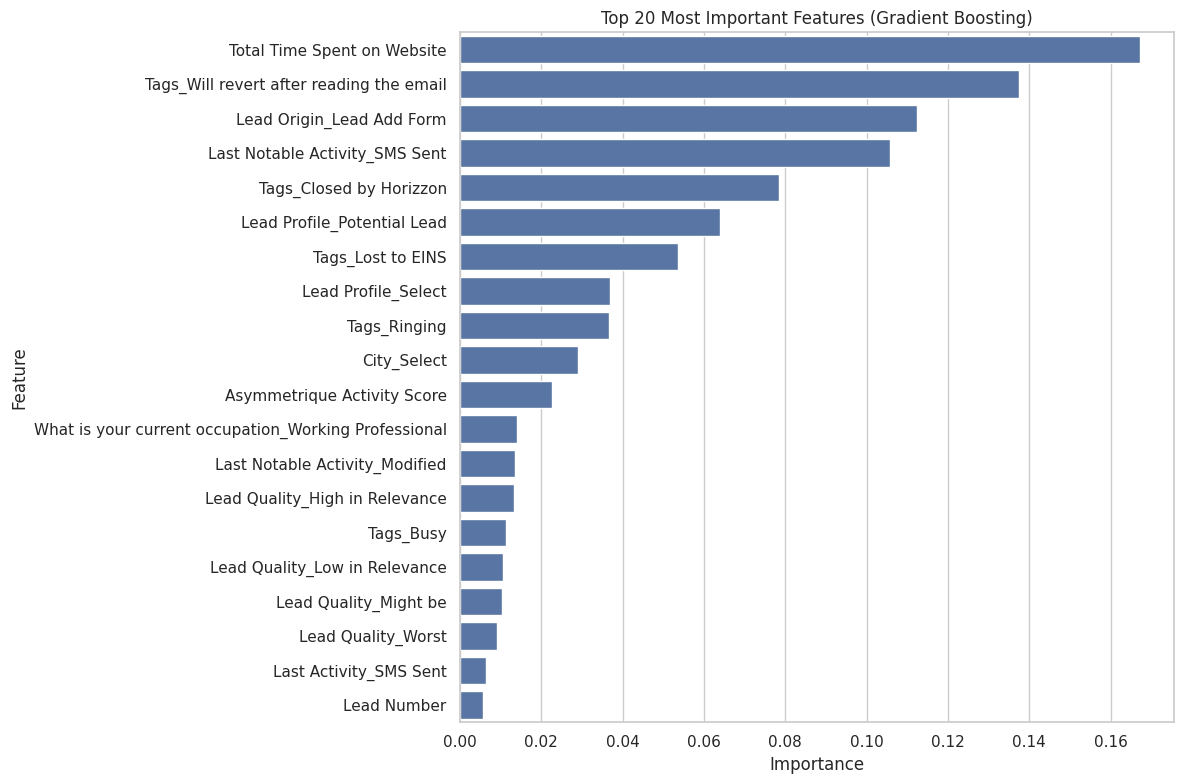

In [115]:
# 7) Sort by importance descending
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# 8) Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_imp_df.head(20)
)
plt.title("Top 20 Most Important Features (Gradient Boosting)")
plt.tight_layout()
plt.show()

In [116]:
# 9) Print top 10 features for reference
print("\nTop 10 Most Important Features:")
print(feat_imp_df.head(10))


Top 10 Most Important Features:
                                       Feature  Importance
2                  Total Time Spent on Website    0.167209
9402  Tags_Will revert after reading the email    0.137477
9248                 Lead Origin_Lead Add Form    0.112327
9450            Last Notable Activity_SMS Sent    0.105779
9385                   Tags_Closed by Horizzon    0.078510
9419               Lead Profile_Potential Lead    0.064037
9393                         Tags_Lost to EINS    0.053573
9420                       Lead Profile_Select    0.037003
9397                              Tags_Ringing    0.036595
9426                               City_Select    0.028983


I used get_feature_names_out() to correctly retrieve one-hot encoded categorical feature names.

assert ensures that lengths match; this prevents the previous ValueError.

The plot and table now correctly show feature importance for all features.

✅ Step 8 — Bagging Classifier

In [117]:
# ------------------------------------------------------------
# Step 8: Train Bagging Classifier
# ------------------------------------------------------------
# Purpose:
# - Train a Bagging model on the same preprocessed data
# - Evaluate and compare with Gradient Boosting
# ------------------------------------------------------------

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [118]:
# 1) Initialize Bagging Classifier with Decision Trees
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=None, random_state=42),  # use 'estimator' instead of 'base_estimator'
    n_estimators=100,      # number of trees
    max_samples=0.8,       # fraction of samples for each tree
    max_features=1.0,      # fraction of features for each tree
    random_state=42
)

In [119]:
# 2) Train the Bagging model
print("Training Bagging Classifier...")
bag_model.fit(X_train, y_train)

Training Bagging Classifier...


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.8, n_estimators=100, random_state=42)

In [120]:
# 3) Predict on test set
y_pred_bag = bag_model.predict(X_test)

In [121]:
# 4) Evaluate model performance
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("\nBagging Classifier Performance:")
print("Accuracy on test set: {:.2%}".format(accuracy_bag))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bag))


Bagging Classifier Performance:
Accuracy on test set: 93.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1136
           1       0.91      0.92      0.92       712

    accuracy                           0.93      1848
   macro avg       0.93      0.93      0.93      1848
weighted avg       0.93      0.93      0.93      1848



In [124]:
# 5) Confusion Matrix
cm_bag = confusion_matrix(y_test, y_pred_bag)
print("Confusion Matrix:")
print(cm_bag)

Confusion Matrix:
[[1071   65]
 [  56  656]]


In [125]:
# 6) Step summary
print("\nStep 8 completed: Bagging Classifier trained and evaluated successfully.")


Step 8 completed: Bagging Classifier trained and evaluated successfully.


✅ Step 9 — Feature Importance for Bagging Classifier

# ------------------------------------------------------------
# Step 9: Feature Importance (Bagging Classifier)
# ------------------------------------------------------------
# Purpose:
# - Approximate feature importance by averaging importances from all base trees
# - Visualize top features
# ------------------------------------------------------------

In [126]:
# 1) Initialize array to store importances
n_features = X_train.shape[1]
importances_array = np.zeros(n_features)

In [127]:
# 2) Loop through each tree and sum feature importances
for tree in bag_model.estimators_:
    importances_array += tree.feature_importances_

In [128]:
# 3) Average over all trees
importances_array /= len(bag_model.estimators_)

In [129]:
# 4) Use the same feature names as before (from preprocessing)
# Numeric + one-hot categorical features
numeric_names = numeric_features
cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_names, cat_names])

In [130]:
# 5) Create DataFrame
bag_feat_imp_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_array
})

In [131]:
# 6) Sort descending
bag_feat_imp_df = bag_feat_imp_df.sort_values(by='Importance', ascending=False)

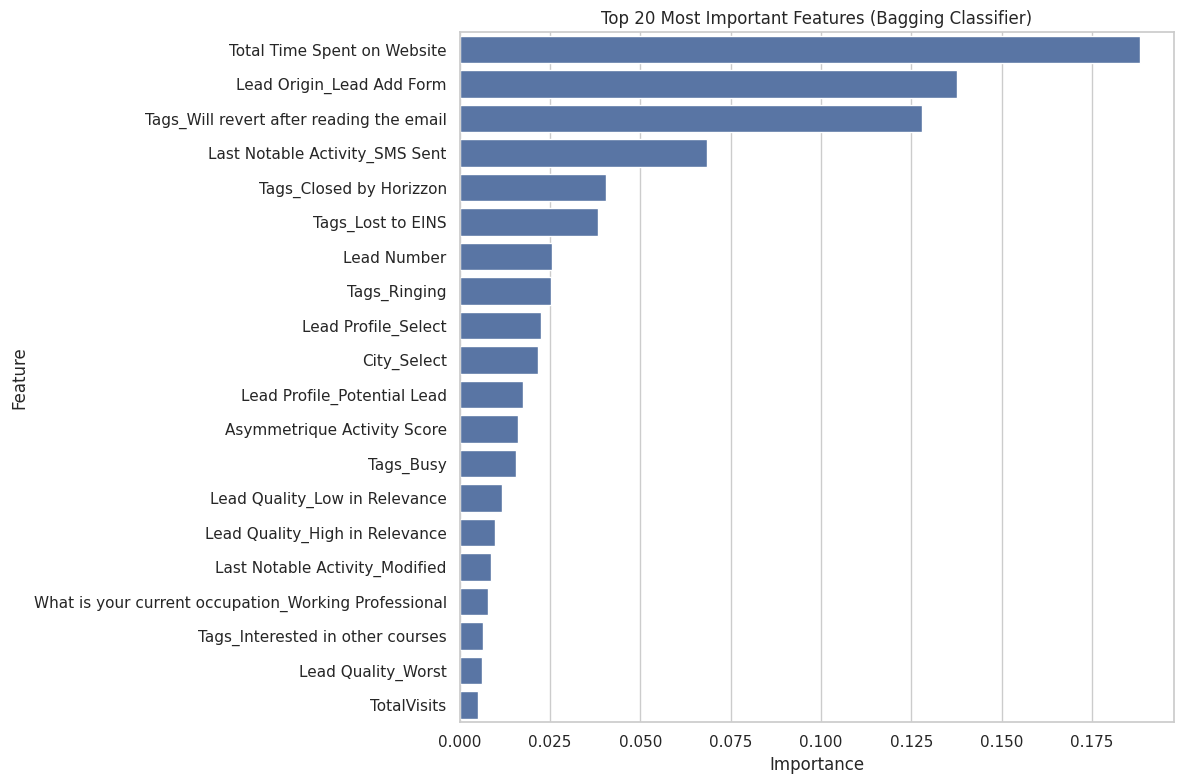

In [132]:
# 7) Plot Top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=bag_feat_imp_df.head(20)
)
plt.title("Top 20 Most Important Features (Bagging Classifier)")
plt.tight_layout()
plt.show()

In [133]:
# 8) Print top 10 features
print("\nTop 10 Most Important Features (Bagging Classifier):")
print(bag_feat_imp_df.head(10))

print("\nStep 9 completed: Bagging feature importances computed and visualized.")


Top 10 Most Important Features (Bagging Classifier):
                                       Feature  Importance
2                  Total Time Spent on Website    0.188282
9248                 Lead Origin_Lead Add Form    0.137536
9402  Tags_Will revert after reading the email    0.127875
9450            Last Notable Activity_SMS Sent    0.068522
9385                   Tags_Closed by Horizzon    0.040360
9393                         Tags_Lost to EINS    0.038174
0                                  Lead Number    0.025448
9397                              Tags_Ringing    0.025221
9420                       Lead Profile_Select    0.022384
9426                               City_Select    0.021668

Step 9 completed: Bagging feature importances computed and visualized.


✅ Step 10 — Hyperparameter Tuning & Comparison

In [134]:
# ------------------------------------------------------------
# Step 10: Hyperparameter Tuning & Model Comparison
# ------------------------------------------------------------
# Purpose:
# - Optimize Gradient Boosting parameters using GridSearchCV
# - Compare performance with Bagging
# ------------------------------------------------------------

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [135]:
# 1) Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [136]:
# 2) Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,              # 3-fold cross-validation
    n_jobs=-1,         # use all cores
    verbose=1
)

In [137]:
# 3) Fit GridSearchCV on training data
print("Running GridSearchCV for Gradient Boosting...")
grid_search.fit(X_train, y_train)

Running GridSearchCV for Gradient Boosting...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [138]:
# 4) Best parameters
print("\nBest hyperparameters found:")
print(grid_search.best_params_)


Best hyperparameters found:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [139]:
# 5) Evaluate tuned model on test set
best_gb_model = grid_search.best_estimator_
y_pred_tuned = best_gb_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("\nTuned Gradient Boosting Accuracy on Test Set: {:.2%}".format(accuracy_tuned))
print("\nClassification Report for Tuned Gradient Boosting:")
print(classification_report(y_test, y_pred_tuned))


Tuned Gradient Boosting Accuracy on Test Set: 93.02%

Classification Report for Tuned Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1136
           1       0.90      0.92      0.91       712

    accuracy                           0.93      1848
   macro avg       0.93      0.93      0.93      1848
weighted avg       0.93      0.93      0.93      1848



In [140]:
# 6) Compare with Bagging
print("\nBagging Classifier Accuracy on Test Set: {:.2%}".format(accuracy_bag))


Bagging Classifier Accuracy on Test Set: 93.45%


In [141]:
# 7) Step summary
print("\nStep 10 completed: Hyperparameter tuning finished and model comparison done.")


Step 10 completed: Hyperparameter tuning finished and model comparison done.
